# Project - Gender recognition by voice
## EPFL - Statistical learning (MATH-412) 
## Adrien Besson

### 3. Classification with 50/50 split of the dataset

In [3]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as lda
import sklearn.linear_model as lm
import sklearn.model_selection as model_selection
import sklearn.preprocessing as preproc
from sklearn import svm, tree, ensemble, neighbors, metrics
import os

In [4]:
# Load the data
input_file = os.path.join(os.getcwd(), 'data', 'voice.csv')
data = pd.read_csv(input_file)
data['label'] = data['label'].astype('category')

In [5]:
# Drop collinear columns
cols_to_drop = ['IQR', 'dfrange', 'centroid']
data = data.drop(cols_to_drop,axis=1)

In [6]:
# Assign quantitative values to the labels and drop them from the data
encoder = preproc.LabelEncoder()
labels = data['label'].values
labels = encoder.fit_transform(labels)
data = data.drop(['label'],axis=1)

## Split the dataset into two subsets of equal size

In [31]:
# Scale the features to have mean 0 and variance 1
seed = 1
features = data.values
features = preproc.scale(features)
# Split our dataset into two subsets
features_1, features_2, labels_1, labels_2 = model_selection.train_test_split(features, labels, train_size=0.5, test_size=0.5, random_state=seed)

## Best parameter selection on a first subset

In [32]:
# k-NN classification
param_grid = [
  {'n_neighbors': np.arange(1, 20, 1)}
] 
knn_grid = model_selection.GridSearchCV(estimator=neighbors.KNeighborsClassifier(), cv=10, param_grid=param_grid, n_jobs=-1)
knn_grid.fit(X=features_1, y=labels_1)

# Logistic regression with L2 regularization
logistic_reg = lm.LogisticRegressionCV(penalty='l2', cv=10, solver='liblinear', random_state=seed)
logistic_reg.fit(X=features_1, y=labels_1)

# Logistic regression with L1 regularization
logistic_reg_l1 = lm.LogisticRegressionCV(penalty='l1', cv=10, solver='liblinear', random_state=seed)
logistic_reg_l1.fit(X=features_1, y=labels_1)

# SVM classification - Linear kernel
param_grid = [
  {'C': [8, 9, 10 ,11 ,12], 'gamma':[0.2, 0.21, 0.22, 0.23, 0.24, 0.25]}
]
class_svm = svm.SVC(kernel='linear', random_state=seed)
class_svm_grid = model_selection.GridSearchCV(estimator=class_svm, cv=10, param_grid=param_grid, n_jobs=-1)
class_svm_grid.fit(X=features_1, y=labels_1)

# SVM classification - RBF kernel
param_grid = [
  {'C': 2.0**(np.arange(-5, 15, 2)), 'gamma':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25], 'kernel':['rbf']}
]
class_svm_k = svm.SVC(random_state=seed)
class_svm_k_grid = model_selection.GridSearchCV(estimator=class_svm_k, cv=10, param_grid=param_grid, n_jobs=-1)
class_svm_k_grid.fit(X=features_1, y=labels_1)

# Decision Tree
param_grid = [
  {'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)
dec_tree_grid = model_selection.GridSearchCV(estimator=dec_tree, cv=10, param_grid=param_grid, n_jobs=-1)
dec_tree_grid.fit(X=features_1, y=labels_1)

# Random Forest
param_grid = [
  {'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
random_forest = ensemble.RandomForestClassifier(criterion='entropy', random_state=seed, n_jobs=-1)
random_forest_grid = model_selection.GridSearchCV(estimator=random_forest, cv=10, param_grid=param_grid, n_jobs=-1)
random_forest_grid.fit(X=features_1, y=labels_1)

# AdaBoost
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500], 'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10]}
]
ada_boost = ensemble.AdaBoostClassifier(random_state=seed)
ada_boost_grid = model_selection.GridSearchCV(estimator=ada_boost, cv=10, param_grid=param_grid)
ada_boost_grid.fit(X=features_1, y=labels_1)

# Grad boost
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500], 'learning_rate':[1e-3, 1e-2, 1e-1, 1, 10], 'min_samples_leaf': [1, 5,10,50,100,200,500]}
]
g_boost = ensemble.GradientBoostingClassifier(random_state=seed)
g_boost_grid = model_selection.GridSearchCV(estimator=g_boost, cv=10, param_grid=param_grid)
g_boost_grid.fit(X=features_1, y=labels_1)

# Bagging
param_grid = [
  {'n_estimators': [1, 5,10,50,100,200,500]}
]
bagging = ensemble.BaggingClassifier(random_state=seed)
bagging_grid = model_selection.GridSearchCV(estimator=bagging, cv=10, param_grid=param_grid)
bagging_grid.fit(X=features_1, y=labels_1)


GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
         verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1, 5, 10, 50, 100, 200, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

## Comparison of the models on a second subset using 5-fold CV

## k-NN

## LDA/QDA 

In [33]:
lda_class = lda.LinearDiscriminantAnalysis()
class_score_lda = np.mean(model_selection.cross_val_score(estimator=lda_class, X=features_2, y=labels_2, cv=5))
print('Classification loss - LDA: {0} %'.format((1-class_score_lda)*100))

Classification loss - LDA: 3.1563710418080815 %


In [34]:
qda_class = lda.QuadraticDiscriminantAnalysis()
class_score_qda = np.mean(model_selection.cross_val_score(estimator=qda_class, X=features_2, y=labels_2, cv=5))
print('Classification loss - QDA: {0} %'.format((1-class_score_qda)*100))

Classification loss - QDA: 3.787685181487832 %


## Logistic regression

In [35]:
# Logistic regression
logistic = lm.LogisticRegression(penalty='l2', solver='liblinear', random_state=seed)
logistic.set_params(C=1e9)
class_score_l2 = np.mean(model_selection.cross_val_score(estimator=logistic, X=features_2, y=labels_2, cv=5))
print('Classification loss - Logistic : {0} %'.format((1-class_score_l2)*100))

Classification loss - Logistic : 3.0932795591582463 %


## Logistic regression - Ridge

In [36]:
class_score_reg_l2 = np.mean(model_selection.cross_val_score(estimator=logistic_reg, X=features_2, y=labels_2, cv=5))
print('Classification loss - Logistic Ridge: {0} %'.format((1-class_score_reg_l2)*100))

Classification loss - Logistic Ridge: 2.9670965938585647 %


## Logistic regression - LASSO

In [37]:
class_score_reg_l1 = np.mean(model_selection.cross_val_score(estimator=logistic_reg_l1, X=features_2, y=labels_2, cv=5))
print('Classification loss - Logistic LASSO: {0}'.format((1-class_score_reg_l1)*100))

Classification loss - Logistic LASSO: 2.90420476779939


## Linear SVM 

In [38]:
score_svm = np.mean(model_selection.cross_val_score(estimator=class_svm_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - linear SVM: {0} %'.format((1-score_svm)*100))

Classification loss - linear SVM: 3.2192628678672675 %


## Kernel SVM - RBF

In [39]:
score_svm_k = np.mean(model_selection.cross_val_score(estimator=class_svm_k_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - kernel SVM - L2: {0} %'.format((1-score_svm_k)*100))

Classification loss - kernel SVM - L2: 2.1467076628199466 %


## Decision Tree

In [40]:
score_tree = np.mean(model_selection.cross_val_score(estimator=dec_tree_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - Decision tree: {0} %'.format((1-score_tree)*100))

Classification loss - Decision tree: 4.166633390568231 %


In [41]:
# Feature importance
ind = np.argsort(dec_tree_grid.best_estimator_.feature_importances_)[::-1]
for name, importance in zip(data.columns[ind], dec_tree_grid.best_estimator_.feature_importances_[ind]):
    print('Feature: {0} - Importance: {1} %'.format(name, np.around(importance, 3)*100))

Feature: meanfun - Importance: 86.7 %
Feature: Q75 - Importance: 3.1 %
Feature: Q25 - Importance: 2.4 %
Feature: minfun - Importance: 2.3 %
Feature: sfm - Importance: 1.3 %
Feature: sp.ent - Importance: 1.2 %
Feature: sd - Importance: 1.0 %
Feature: maxdom - Importance: 0.8999999999999999 %
Feature: meanfreq - Importance: 0.6 %
Feature: mode - Importance: 0.4 %
Feature: kurt - Importance: 0.0 %
Feature: skew - Importance: 0.0 %
Feature: maxfun - Importance: 0.0 %
Feature: meandom - Importance: 0.0 %
Feature: median - Importance: 0.0 %
Feature: mindom - Importance: 0.0 %
Feature: modindx - Importance: 0.0 %


## Random Forest

In [42]:
score_rf = np.mean(model_selection.cross_val_score(estimator=random_forest_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - Random forest: {0} %'.format((1-score_rf)*100))

Classification loss - Random forest: 2.714930319849862 %


In [43]:
# Feature importance
ind = np.argsort(random_forest_grid.best_estimator_.feature_importances_)[::-1]
for name, importance in zip(data.columns[ind], random_forest_grid.best_estimator_.feature_importances_[ind]):
    print('Feature: {0} - Importance: {1} %'.format(name, np.around(importance, 3)*100))

Feature: meanfun - Importance: 37.0 %
Feature: sd - Importance: 17.5 %
Feature: Q25 - Importance: 13.8 %
Feature: sp.ent - Importance: 11.1 %
Feature: sfm - Importance: 3.8 %
Feature: mode - Importance: 3.2 %
Feature: median - Importance: 2.1 %
Feature: Q75 - Importance: 2.1 %
Feature: minfun - Importance: 1.4000000000000001 %
Feature: kurt - Importance: 1.3 %
Feature: maxfun - Importance: 1.0999999999999999 %
Feature: meandom - Importance: 1.0999999999999999 %
Feature: maxdom - Importance: 1.0999999999999999 %
Feature: meanfreq - Importance: 1.0 %
Feature: modindx - Importance: 0.8999999999999999 %
Feature: skew - Importance: 0.8 %
Feature: mindom - Importance: 0.7000000000000001 %


## AdaBoost 

In [44]:
score_ab = np.mean(model_selection.cross_val_score(estimator=ada_boost_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - AdaBoost: {0} %'.format((1-score_ab)*100))

Classification loss - AdaBoost: 2.6516391806093553 %


## Gradient Boosting

In [45]:
score_gb = np.mean(model_selection.cross_val_score(estimator=g_boost_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - Gradient Boosting: {0} %'.format((1-score_gb)*100))

Classification loss - Gradient Boosting: 2.209799145469782 %


## Bagging

In [46]:
score_bag = np.mean(model_selection.cross_val_score(estimator=bagging_grid.best_estimator_, X=features_2, y=labels_2, cv=5))
print('Classification loss - Bagging: {0} %'.format((1-score_bag)*100))

Classification loss - Bagging: 3.4726270814199545 %


## ROC curves of different classifiers

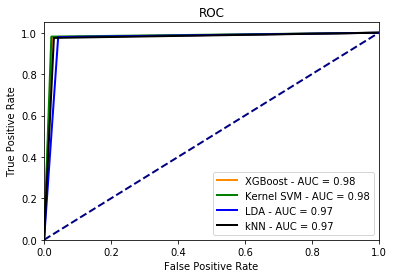

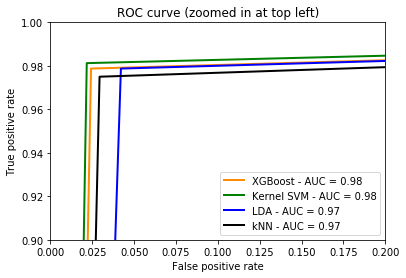

In [47]:
# Split the second set into 5 folds
model_selection.KFold(n_splits=5)
fpr_kfold = []
tpr_kfold = []
# Loop over the folds
for train_index, test_index in kf.split(X):
    # Gradient boosting classifier
    fpr, tpr, thresh = metrics.roc_curve(y_true=labels_2, y_score=g_boost_grid.best_estimator_.predict(X=features_2[test_index]))
    auc = metrics.auc(fpr, tpr)
    fpr_kfold.append(fpr)
    tpr_kfold.append(tpr) 
    # Kernel SVM
    fpr_svm, tpr_svm, thresh = metrics.roc_curve(y_true=labels_2, y_score=class_svm_k_grid.best_estimator_.predict(X=features_2[test_index]))
    auc_svm = metrics.auc(fpr_svm, tpr_svm)

    # LDA
    lda_class.fit(X=features_2, y=labels_2)
    fpr_lda, tpr_lda, thresh = metrics.roc_curve(y_true=labels_2, y_score=lda_class.predict(X=features_2[test_index]))
    auc_lda = metrics.auc(fpr_lda, tpr_lda)

    # kNN
    fpr_knn, tpr_knn, thresh = metrics.roc_curve(y_true=labels_2, y_score=knn_grid.best_estimator_.predict(X=features_2[test_index]))
    auc_knn = metrics.auc(fpr_knn, tpr_knn)

plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='XGBoost - AUC = %0.2f' % auc)
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='Kernel SVM - AUC = %0.2f' % auc_svm)
plt.plot(fpr_lda, tpr_lda, color='blue',
         lw=lw, label='LDA - AUC = %0.2f' % auc_lda)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='kNN - AUC = %0.2f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

plt.figure(2)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='XGBoost - AUC = %0.2f' % auc)
plt.plot(fpr_svm, tpr_svm, color='green',
         lw=lw, label='Kernel SVM - AUC = %0.2f' % auc_svm)
plt.plot(fpr_lda, tpr_lda, color='blue',
         lw=lw, label='LDA - AUC = %0.2f' % auc_lda)
plt.plot(fpr_knn, tpr_knn, color='black',
         lw=lw, label='kNN - AUC = %0.2f' % auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim(0, 0.2)
plt.ylim(0.9, 1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='lower right')
plt.show()

## Conclusions
 1. Gradient boosting gives the best results. It is slightly better than kernel SVM.
 1. With the 50/50 split strategy, the variance of the test error is reduced compared to the 80/20 split approach. But the variance is still quite high. It could be reduced by increasing the number of folds. Given the size of the datasets, it would lead to too much bias.